In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Згенеруємо синтетичні дані, за двовимірним нормальним розподілом

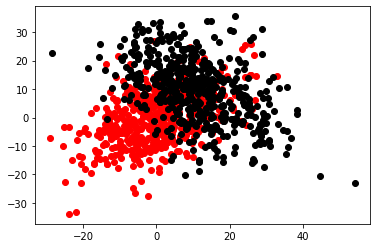

In [2]:
mean0 = np.array([0,0])
cov0 = np.array([[100, 50],[50,100]])

mean1 = np.array([10,10])
cov1 = np.array([[120,-60],[-60, 120]])

sample0 = np.random.multivariate_normal(mean=mean0, cov=cov0, size=500)
sample1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=500)

plt.scatter(sample0[:,0], sample0[:,1], color='red')
plt.scatter(sample1[:,0], sample1[:,1], color='black')

In [3]:
sample_united = np.vstack([sample0, sample1])
sample_united.shape

(1000, 2)

# EM-алгоритм дозволяє відновити середнє, та ков матрицю кластерів, у припущенні, що дані є сумішшю двох нормальних розподілів

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(sample_united)

gmm.means_, gmm.covariances_

(array([[10.83327546,  9.3656104 ],
        [-1.91401562, -1.28996146]]),
 array([[[122.49518026, -48.49910384],
         [-48.49910384, 113.72812313]],
 
        [[ 82.0204859 ,  35.05399271],
         [ 35.05399271,  87.62616692]]]))

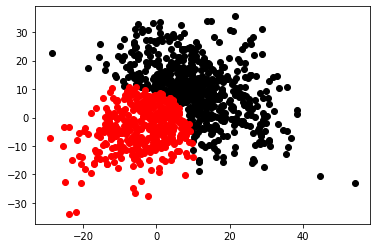

In [5]:
predict = gmm.predict(sample_united)

plt.scatter(sample_united[predict==0][:,0], sample_united[predict==0][:,1], color='black')
plt.scatter(sample_united[predict==1][:,0], sample_united[predict==1][:,1], color='red')